In [ ]:
import numpy as np
class BaseOptimizer:
    def __init__(self):
        pass

    def __call__(self,fun,x0,**kwargs):
        x = x0
        state = self._initialize(**kwargs)
        while state['cond'](**kwargs):
            state = self._step(x,**kwargs)
    def _initialize(self,**kwargs) -> dict:
        state = {}
        return state

    def _step(self,x,**kwargs) -> dict:
        state = {}
        return state

class GaussNewton(BaseOptimizer):
    def __init__(self,tol = 1e-6,max_iter = 100):
        self.tol = tol
        self.max_iter = max_iter
        super().__init__()
    def _initialize(self,**kwargs):
        state = super()._initialize(**kwargs)
        state['iter'] = 0
        state['x'] = kwargs['x0']
        state['r'] = kwargs['f'](state['x'])
        state['J'] = kwargs['df'](state['x'])
        state['loss'] = np.sum(state['r']**2)
        return state
    def _step(self,x,**kwargs):
        state = super()._step(x,**kwargs)
        state['r'] = kwargs['f'](state['x'])
        state['J'] = kwargs['df'](state['x'])
        state['Jtrans'] = state['J'].T
        state['grad'] = np.matmul(state['Jtrans'],state['r'])
        state['gradnorm'] = np.linalg.norm(state['grad'])
        if state['gradnorm'] < self.tol:

In [56]:
import matplotlib.pyplot as plt
from pickle import dump,load

from LSQClassifier import LSQClassifier
from data_utils import get_train_test

X_train, X_test, y_train, y_test = get_train_test(k=20)

# model = LSQClassifier(solver='lm')
# model = LSQClassifier(solver='ngd',solverkwargs={'TOL' : 1e-6,'ITER_MAX' : 100,'momentum' : .95})
model = LSQClassifier(solver='ngd',solverkwargs={'TOL' : 1e-6,'ITER_MAX' : 100,'step_size':.001,'lam':.1,'momentum' : .9,'deterministic':True},verbose=True)
# model = LSQClassifier(solver='adam',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 25,'step_size':.5,'beta1':.9,'beta2':.99,'epsilon':1e-8,'lam':0.01},verbose=True)
# model = LSQClassifier(solver='adam',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 25,'step_size':.5,'beta1':.9,'beta2':.99,'epsilon':1e-8,'lam':0.01,'deterministic':True},verbose=True)

# model = LSQClassifier(solver='sgd',solverkwargs={'TOL' : 1e-3,'ITER_MAX' : 600,'batch_size' : 100,'step_size' : 1e-3},verbose=True)

model.fit(X_train,y_train)


SGD, iter #0: loss = 2.8940e+01, gradnorm = 1.0778e+02
SGD, iter #1: loss = 6.8681e+01, gradnorm = 2.8215e+01
SGD, iter #2: loss = 8.7374e+01, gradnorm = 3.4081e+01
SGD, iter #3: loss = 6.1034e+01, gradnorm = 1.5898e+01
SGD, iter #4: loss = 4.3906e+01, gradnorm = 6.9396e+00
SGD, iter #5: loss = 3.6692e+01, gradnorm = 4.0080e+00
SGD, iter #6: loss = 3.5351e+01, gradnorm = 2.9579e+00
SGD, iter #7: loss = 3.7703e+01, gradnorm = 3.1484e+00
SGD, iter #8: loss = 4.1563e+01, gradnorm = 4.0144e+00
SGD, iter #9: loss = 4.4854e+01, gradnorm = 4.7205e+00
SGD, iter #10: loss = 4.6252e+01, gradnorm = 4.9082e+00
SGD, iter #11: loss = 4.5514e+01, gradnorm = 4.5737e+00
SGD, iter #12: loss = 4.3207e+01, gradnorm = 3.9361e+00
SGD, iter #13: loss = 4.0088e+01, gradnorm = 3.2074e+00
SGD, iter #14: loss = 3.6837e+01, gradnorm = 2.5531e+00
SGD, iter #15: loss = 3.3924e+01, gradnorm = 1.9763e+00
SGD, iter #16: loss = 3.1761e+01, gradnorm = 1.5941e+00
SGD, iter #17: loss = 3.0500e+01, gradnorm = 1.4729e+00
SG

In [40]:
from data_utils import accuracy, confusion_matrix

preds = model.predict(X_test)

print(accuracy(preds, y_test))
print(confusion_matrix(preds, y_test))

0.9907535829865927
[[1129.    6.]
 [  14. 1014.]]


model = ngd
SGD, iter #0: loss = 2.8940e+01, gradnorm = 1.0778e+02
SGD, iter #1: loss = 1.1058e+01, gradnorm = 2.8215e+01
SGD, iter #2: loss = 1.3494e+01, gradnorm = 3.4081e+01
SGD, iter #3: loss = 8.1298e+00, gradnorm = 1.5898e+01
SGD, iter #4: loss = 5.2484e+00, gradnorm = 6.9396e+00
SGD, iter #5: loss = 4.1790e+00, gradnorm = 4.0080e+00
SGD, iter #6: loss = 3.9480e+00, gradnorm = 2.9579e+00
SGD, iter #7: loss = 4.1933e+00, gradnorm = 3.1484e+00
SGD, iter #8: loss = 4.6259e+00, gradnorm = 4.0144e+00
SGD, iter #9: loss = 4.9923e+00, gradnorm = 4.7205e+00
SGD, iter #10: loss = 5.1414e+00, gradnorm = 4.9082e+00
SGD, iter #11: loss = 5.0485e+00, gradnorm = 4.5737e+00
SGD, iter #12: loss = 4.7803e+00, gradnorm = 3.9361e+00
SGD, iter #13: loss = 4.4265e+00, gradnorm = 3.2074e+00
SGD, iter #14: loss = 4.0679e+00, gradnorm = 2.5531e+00
SGD, iter #15: loss = 3.7582e+00, gradnorm = 1.9763e+00
SGD, iter #16: loss = 3.5285e+00, gradnorm = 1.5941e+00
SGD, iter #17: loss = 3.3954e+00, gradnorm = 1

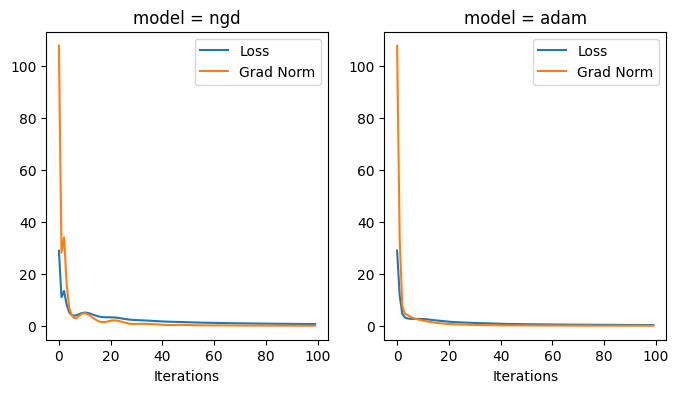

In [73]:
det_models = {'ngd':{'TOL' : 1e-6,'ITER_MAX' : 100,'step_size':.001,'lam':.01,'momentum' : .9,'deterministic':True},
              'adam':{'TOL' : 1e-3,'ITER_MAX' : 100,'step_size':.5,'beta1':.9,'beta2':.99,'epsilon':1e-8,'lam':0.01,'deterministic':True}}
fig, ax = plt.subplots(1,2,figsize=(8,4))

for i,model_kw in enumerate(det_models.keys()):
    print(f"model = {model_kw}")
    model = LSQClassifier(solver=model_kw,solverkwargs=det_models[model_kw],verbose=True)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    ax[i].set_title(f"model = {model_kw}")
    ax[i].plot(model.report['Loss_vals'],label = 'Loss')
    ax[i].plot(model.report['gradnorm_vals'],label = 'Grad Norm')
    ax[i].legend()
    ax[i].set_xlabel('Iterations')
    print(accuracy(preds, y_test))
    print(confusion_matrix(preds, y_test))

model = sgd


SGD, iter #0: loss = 2.8940e+01, gradnorm = 1.0778e+02
SGD, iter #1: loss = 1.3682e+01, gradnorm = 3.7655e+01
SGD, iter #2: loss = 1.1286e+01, gradnorm = 2.7192e+01
SGD, iter #3: loss = 9.0258e+00, gradnorm = 1.8729e+01
SGD, iter #4: loss = 7.3179e+00, gradnorm = 1.2905e+01
SGD, iter #5: loss = 6.5481e+00, gradnorm = 1.1146e+01
SGD, iter #6: loss = 5.9086e+00, gradnorm = 1.0268e+01
SGD, iter #7: loss = 5.5568e+00, gradnorm = 9.4570e+00
SGD, iter #8: loss = 5.4155e+00, gradnorm = 9.1138e+00
SGD, iter #9: loss = 4.9114e+00, gradnorm = 8.0441e+00
SGD, iter #10: loss = 4.5859e+00, gradnorm = 7.2654e+00
SGD, iter #11: loss = 4.4252e+00, gradnorm = 6.7877e+00
SGD, iter #12: loss = 4.1887e+00, gradnorm = 6.0094e+00
SGD, iter #13: loss = 3.7649e+00, gradnorm = 5.0317e+00
SGD, iter #14: loss = 3.4917e+00, gradnorm = 4.4740e+00
SGD, iter #15: loss = 3.3208e+00, gradnorm = 4.1351e+00
SGD, iter #16: loss = 3.0291e+00, gradnorm = 3.5889e+00
SGD, iter #17: loss = 2.9605e+00, gradnorm = 3.4685e+00
SG

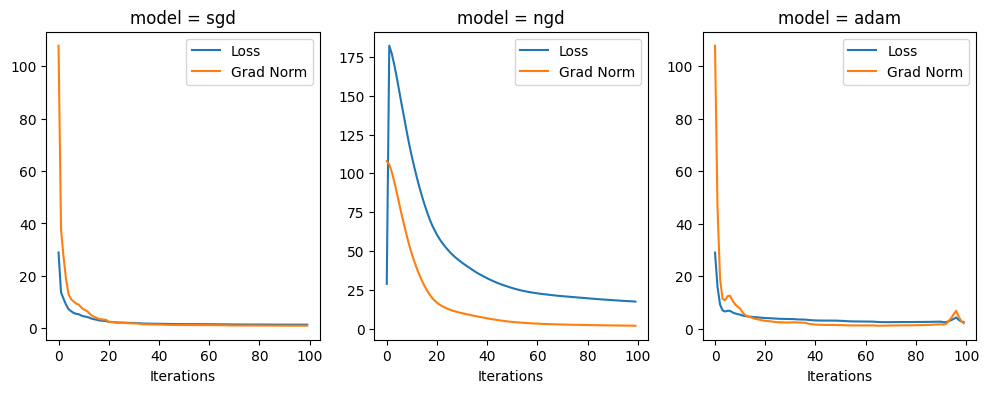

In [71]:
from data_utils import accuracy, confusion_matrix

def step_decay(iter, eta0=5e-2, drop=0.5, epochs_drop=25):
    return eta0 * (drop ** (iter // epochs_drop))

fig, ax = plt.subplots(1,3,figsize=(12,4))

stoch_models = {'sgd':{'TOL' : 1e-3,'ITER_MAX' : 100,'batch_size' : 256,'step_size' : step_decay},
                'ngd':{'TOL' : 1e-3,'ITER_MAX' : 100,'batch_size' : 256,'step_size':.001,'lam':.1,'momentum' : .9,'deterministic':False},
                'adam':{'TOL' : 1e-3,'ITER_MAX' : 100,'batch_size' : 256,'step_size':.5,'beta1':.9,'beta2':.99,'epsilon':1e-8,'lam':0.01,'deterministic':False}}

for i,model_kw in enumerate(stoch_models.keys()):
    print(f"model = {model_kw}")
    model = LSQClassifier(solver=model_kw,solverkwargs=stoch_models[model_kw],verbose=True)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    ax[i].set_title(f"model = {model_kw}")
    ax[i].plot(model.report['Loss_vals'],label = 'Loss')
    ax[i].plot(model.report['gradnorm_vals'],label = 'Grad Norm')
    ax[i].set_xlabel('Iterations')
    ax[i].legend()
    print(accuracy(preds, y_test))
    print(confusion_matrix(preds, y_test))